In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os

In [58]:
# Get data
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/my_app/app_data/possum.csv"
df = pd.read_csv(data_dir)
df = df.dropna()

X = df.drop(["case", "site", "Pop", 'earconch', 'footlgth', 'sex'], axis=1)
y = df["sex"]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_features="auto", random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [4]:
predictions = rf_model.predict(X_test)
predictions

array(['f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f',
       'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm',
       'f', 'f', 'f', 'm', 'm'], dtype=object)

In [5]:
# The true values are the following:
np.array(y_test)

array(['f', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm',
       'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'm', 'f', 'm', 'f'], dtype=object)

In [6]:
comparison = pd.DataFrame({"Predictions": predictions, "Actual": np.array(y_test)})
comparison

Predictions Actual
0            f      f
1            m      m
2            f      f
3            f      m
4            m      m
5            f      f
6            m      f
7            m      m
8            f      f
9            m      m
10           m      f
11           m      m
12           f      m
13           m      m
14           m      m
15           m      f
16           m      m
17           m      f
18           m      m
19           f      f
20           m      m
21           f      m
22           m      f
23           m      m
24           m      f
25           m      m
26           f      m
27           f      m
28           f      f
29           m      m
30           m      f

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 6,  7],
       [ 5, 13]])

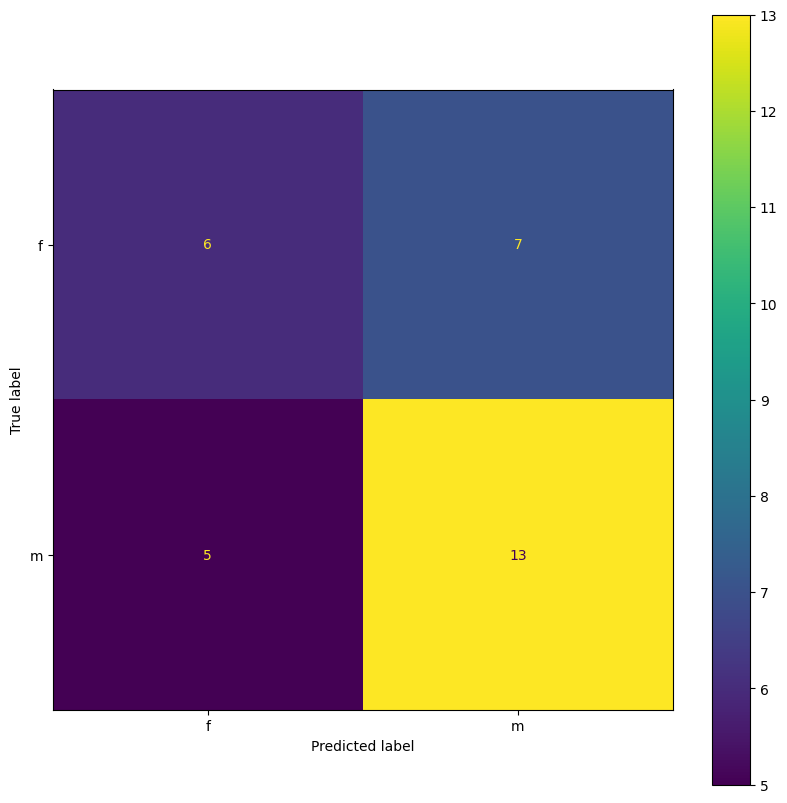

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [9]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f'The importance of feature {columns[i]} is {round(importances[i] * 100,2)} %.')
    i += 1

The importance of feature age is 6.93 %.
The importance of feature hdlngth is 16.18 %.
The importance of feature skullw is 13.81 %.
The importance of feature totlngth is 12.65 %.
The importance of feature taill is 11.79 %.
The importance of feature eye is 18.25 %.
The importance of feature chest is 8.35 %.
The importance of feature belly is 12.05 %.


In [10]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           f       0.55      0.46      0.50        13
           m       0.65      0.72      0.68        18

    accuracy                           0.61        31
   macro avg       0.60      0.59      0.59        31
weighted avg       0.61      0.61      0.61        31



In [11]:
###### Cross Validation
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)

param_dist = {"n_estimators": randint(50, 100), "max_depth": randint(1, 10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print(rand_search.best_params_)

y_pred = best_rf.predict(X_test)

{'max_depth': 7, 'n_estimators': 78}


In [12]:
(y_pred)

array(['f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f',
       'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm',
       'f', 'f', 'f', 'm', 'm'], dtype=object)

In [13]:
y_test

87     f
58     m
69     f
70     m
48     m
39     f
22     f
47     m
10     f
0      m
18     f
30     m
100    m
33     m
80     m
4      f
96     m
81     f
12     m
31     f
79     m
92     m
26     f
44     m
73     f
15     m
41     m
75     m
9      f
99     m
11     f
Name: sex, dtype: object

In [14]:
(np.array(y_test))

array(['f', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm',
       'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'm', 'f', 'm', 'f'], dtype=object)

In [15]:
type(y_test[0])

str

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(np.array(y_test), y_pred, average="binary", pos_label="m")

Accuracy: 0.6129032258064516
Precision: 0.65
Recall: 0.7222222222222222


<AxesSubplot:>

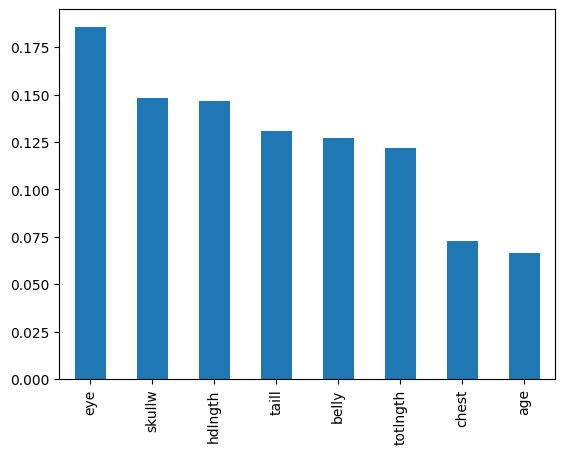

In [18]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(np.array(y_test), y_pred, average="binary", pos_label="m")
recall = recall_score(np.array(y_test), y_pred, average="binary", pos_label="m")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(
    best_rf.feature_importances_, index=X_train.columns
).sort_values(ascending=False)

# Plot a simple bar chart
(feature_importances.plot.bar())


In [29]:
# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2, use_label_encoder = False, eval_metric = "logloss")
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.876 (0.032)


30

# XGBoost for Regression

In [32]:
# evaluate xgboost random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor

X = df.drop(["case", "site", "Pop", 'earconch', 'footlgth'], axis=1) # predicting the age of a possum
y = df["age"]

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -114.511 (8.247)


# Another approach from Datacamp ( https://www.datacamp.com/tutorial/xgboost-in-python )

In [42]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


diamonds = sns.load_dataset("diamonds")

diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [43]:
diamonds.describe(exclude=np.number)

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

In [44]:
from sklearn.model_selection import train_test_split
# Extract feature and target arrays

X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [45]:
# Extract text features

cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category

for col in cats:

   X[col] = X[col].astype('category')

In [46]:
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [47]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
import xgboost as xgb

# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [51]:
# import numpy as np

# mse = np.mean((actual - predicted) ** 2)

# rmse = np.sqrt(mse)

## Training

In [64]:
# Define hyperparameters

params = {"objective": "reg:squarederror", "tree_method": "hist"}  # if you have GPU -> gpu_hist

# Define hyperparameters

params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 10

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

XGBoostError: [18:15:08] /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/gbm/../common/common.h:157: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000014077da54 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000140828506 xgboost::gbm::GBTree::ConfigureUpdaters() + 630
  [bt] (2) 3   libxgboost.dylib                    0x0000000140823000 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1136
  [bt] (3) 4   libxgboost.dylib                    0x0000000140842ebe xgboost::LearnerConfiguration::Configure() + 1406
  [bt] (4) 5   libxgboost.dylib                    0x0000000140843117 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 119
  [bt] (5) 6   libxgboost.dylib                    0x0000000140790e55 XGBoosterUpdateOneIter + 149
  [bt] (6) 7   libffi.8.dylib                      0x000000010c11aa22 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00000003077bdf70 0x0 + 13010460528



## Evaluation 

In [ ]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)

# Sklearn

In [66]:
import xgboost as xgb


# Train a model using the scikit-learn API

xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)


xgb_classifier.fit(X_train, y_train)



# Convert the model to a native API model

model = xgb_classifier.get_booster()

[18:15:51] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
